In [1]:
## Import Packages
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
training=pd.read_csv('har_train.csv')
test=pd.read_csv('har_validate.csv')

In [3]:
training.shape

(13737, 53)

In [4]:
test.shape

(5885, 53)

In [5]:
training.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,...,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,...,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,...,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,...,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
25%,1.100000,1.670000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.46000,-0.180000,-178.000000,54.000000,-182.000000,-613.000000,-3.000000,187.000000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.03000,0.080000,-57.000000,200.000000,-39.000000,-378.000000,595.000000,509.000000
75%,123.000000,14.800000,13.600000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,27.000000,...,41.000000,0.560000,1.64000,0.490000,76.000000,312.000000,26.000000,-72.000000,737.000000,652.000000
max,162.000000,60.300000,179.000000,28.000000,2.220000,0.640000,1.620000,83.000000,164.000000,105.000000,...,73.000000,3.520000,6.13000,4.310000,477.000000,589.000000,291.000000,666.000000,1480.000000,1090.000000


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13737 entries, 0 to 13736
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classe                13737 non-null  object 
 1   roll_belt             13737 non-null  float64
 2   pitch_belt            13737 non-null  float64
 3   yaw_belt              13737 non-null  float64
 4   total_accel_belt      13737 non-null  int64  
 5   gyros_belt_x          13737 non-null  float64
 6   gyros_belt_y          13737 non-null  float64
 7   gyros_belt_z          13737 non-null  float64
 8   accel_belt_x          13737 non-null  int64  
 9   accel_belt_y          13737 non-null  int64  
 10  accel_belt_z          13737 non-null  int64  
 11  magnet_belt_x         13737 non-null  int64  
 12  magnet_belt_y         13737 non-null  int64  
 13  magnet_belt_z         13737 non-null  int64  
 14  roll_arm              13737 non-null  float64
 15  pitch_arm          

In [7]:
training.head(10)

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478
5,A,1.42,8.09,-94.4,3,0.02,0.0,-0.02,-22,3,...,36,0.02,0.00,-0.02,195,205,-215,-18,659,470
6,A,1.42,8.13,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,-0.02,0.00,193,205,-213,-9,660,474
7,A,1.43,8.16,-94.4,3,0.02,0.0,-0.02,-20,2,...,36,0.03,0.00,-0.02,193,204,-214,-16,653,476
8,A,1.45,8.18,-94.4,3,0.03,0.0,-0.02,-21,2,...,36,0.02,-0.02,-0.02,193,205,-214,-17,657,465
9,A,1.43,8.18,-94.4,3,0.02,0.0,-0.02,-22,2,...,36,0.02,0.02,-0.03,191,203,-215,-11,657,478


In [8]:
test.head(10)

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,...,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0
5,A,1.55,8.08,-94.4,3,0.00,0.02,0.00,-21,5,...,36,0.02,0.00,-0.02,192,206,-216,-16,653.0,472.0
6,A,1.60,8.10,-94.4,3,0.02,0.00,-0.02,-20,1,...,36,0.03,-0.03,-0.02,194,208,-214,-11,654.0,469.0
7,A,1.57,8.09,-94.4,3,0.02,0.02,-0.02,-21,3,...,36,0.02,-0.03,-0.02,191,206,-213,-17,654.0,478.0
8,A,1.44,8.19,-94.4,3,0.02,0.00,-0.03,-21,5,...,36,0.00,0.00,0.00,192,206,-216,-19,653.0,466.0
9,A,1.43,8.17,-94.4,3,0.00,0.00,-0.03,-22,4,...,36,0.00,-0.02,-0.02,196,207,-216,-15,650.0,473.0


In [9]:
training['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [10]:
# Create the X and Y
x_train=training.drop('classe',axis=1)
y_train=training['classe']


x_test=test.drop('classe',axis=1)
y_test=test.loc[:,'classe']

In [11]:
#Initiate model
model=GaussianNB()

#fit into model
model.fit(x_train,y_train)

GaussianNB()

In [12]:
#prediction
pred=model.predict(x_test)

In [16]:
pred[:150]

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D',
       'E', 'E', 'E', 'E', 'D', 'C', 'C', 'C', 'D', 'C', 'D', 'D', 'D',
       'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D'], dtype='<U1')

Text(69.0, 0.5, 'Prediction')

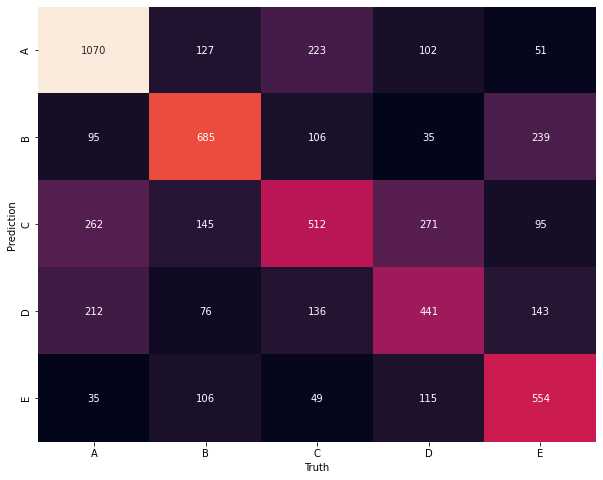

In [32]:
# Plot Confusion Matrix
plt.figure(figsize=(10,8))
mat=confusion_matrix(pred,y_test)
names=np.unique(pred)
sns.heatmap(mat,annot=True,xticklabels=names,yticklabels=names,cbar=False,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Prediction')


In [35]:
from sklearn import metrics
print(metrics.classification_report(pred,y_test,labels=['A','B','C','D','E']))

              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885

